In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
nltk.download("stopwords")
from pymorphy2 import MorphAnalyzer
from collections import Counter 
from sklearn.feature_extraction.text import *
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import * 
morph = MorphAnalyzer()

from string import punctuation
from nltk.corpus import stopwords
punct = punctuation+'«»—…“”*№–'
stops = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/laidhimonthegreen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# загружаем файлы
train = pd.read_csv("./balanced_dataset/train.csv", sep = "\t")
test = pd.read_csv("./balanced_dataset/test.csv", sep = "\t")

In [3]:
def normalize(text):    
    """ токенизируем текст и убираем стоп-слова """
    words = text.lower().split()
    words = [word.strip(punct) for word in words]
    words = [word for word in words if word and word not in stops] 

    return words

In [4]:
train.words = train.notes.apply(lambda x: normalize(x))
test.words = test.notes.apply(lambda x: normalize(x))

In [5]:
def evaluate(true, predicted):

    # макро-усреднение
    print ("Macro")
    print("Precision: {0:6.2f}".format(precision_score(true, predicted, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(true, predicted, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(true, predicted, average='macro')))

    print("...", "\n")
    # микро-усреднение
    print ("Micro")
    print("Precision: {0:6.2f}".format(precision_score(true, predicted, average='micro')))
    print("Recall: {0:6.2f}".format(recall_score(true, predicted, average='micro')))
    print("F1-measure: {0:6.2f}".format(f1_score(true, predicted, average='micro')))

    print("...")
    # accuracy
    print("Accuracy: {0:6.2f}".format(accuracy_score(true, predicted)))

### Лексические эксперименты

In [6]:
tfidf_11 = TfidfVectorizer(ngram_range=(1,1), min_df=10, max_df = 0.9)
tfidf_12 = TfidfVectorizer(ngram_range=(1,2), min_df=10, max_df = 0.9)
tfidf_15 = TfidfVectorizer(ngram_range=(1,5), min_df=10, max_df = 0.9)

In [7]:
classifier_tfidf = LogisticRegression(solver='newton-cg', multi_class='multinomial') #мультиклассовая 
classifier_NB = MultinomialNB()
classifier_SGD = SGDClassifier(alpha=0.001, max_iter=100)

### TF-IDF + LogReg

In [8]:
### TF-IDF (1,1) + Logistic Regression 

In [9]:
clf_tfidf = Pipeline([
    ('vect', tfidf_11),
    ('clf', classifier_tfidf),
])

# учим классификатор
%time clf_tfidf.fit(train.notes, train.TAG)

CPU times: user 640 ms, sys: 15.7 ms, total: 656 ms
Wall time: 655 ms


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=10, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [10]:
predictions_tfidf = clf_tfidf.predict(test.notes)

In [11]:
evaluate(test.TAG, predictions_tfidf)

Macro
Precision:   0.79
Recall:   0.79
F1-measure:   0.79
... 

Micro
Precision:   0.79
Recall:   0.79
F1-measure:   0.79
...
Accuracy:   0.79


In [12]:
### TF-IDF (1,2) + Logistic Regression 

In [13]:
tfidf_12 = TfidfVectorizer(ngram_range=(1,2), min_df=10, max_df=0.9)
tfidf_23 = TfidfVectorizer(ngram_range=(2,3), min_df=1)

In [14]:
clf_tfidf = Pipeline([
    ('vect', tfidf_12),
    ('clf', classifier_tfidf),
])

# учим классификатор
%time clf_tfidf.fit(train.notes, train.TAG)

CPU times: user 3.39 s, sys: 1.5 s, total: 4.89 s
Wall time: 2.19 s


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=10, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [15]:
clf_tfidf = Pipeline([
    ('vect', tfidf_12),
    ('clf', classifier_SGD),
])

# учим классификатор
%time clf_tfidf.fit(train.notes, train.TAG)

CPU times: user 2.57 s, sys: 292 ms, total: 2.86 s
Wall time: 2.23 s


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=10, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', lo

In [16]:
predictions_tfidf = clf_tfidf.predict(test.notes)

In [17]:
evaluate(test.TAG, predictions_tfidf)

Macro
Precision:   0.77
Recall:   0.77
F1-measure:   0.77
... 

Micro
Precision:   0.77
Recall:   0.77
F1-measure:   0.77
...
Accuracy:   0.77


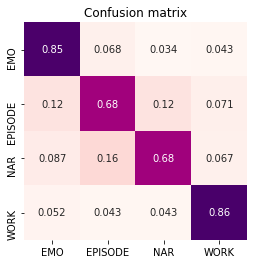

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

m = confusion_matrix(test.TAG, predictions_tfidf)
m = m.astype('float') / m.sum(axis=1)[:, np.newaxis]

labels = clf_tfidf.classes_
plt.figure(figsize = (4,4))
sns.heatmap(data=m, annot=True, cbar=False, xticklabels=labels, yticklabels=labels, cmap="RdPu")
plt.title("Confusion matrix")
plt.show()

In [19]:
### TF-IDF (1,5) + Logistic Regression 

In [20]:
clf_tfidf = Pipeline([
    ('vect', tfidf_15),
    ('clf', classifier_tfidf),
])

# учим классификатор
%time clf_tfidf.fit(train.notes, train.TAG)

CPU times: user 6.39 s, sys: 1.37 s, total: 7.76 s
Wall time: 5.52 s


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=10, ngram_range=(1, 5), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [21]:
predictions_tfidf = clf_tfidf.predict(test.notes)

In [22]:
evaluate(test.TAG, predictions_tfidf)

Macro
Precision:   0.79
Recall:   0.78
F1-measure:   0.78
... 

Micro
Precision:   0.79
Recall:   0.79
F1-measure:   0.79
...
Accuracy:   0.79


In [23]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [24]:
print(classification_report(test.TAG, predictions_tfidf)) 

              precision    recall  f1-score   support

         EMO       0.79      0.85      0.82       117
     EPISODE       0.73      0.74      0.74       112
         NAR       0.78      0.72      0.75       104
        WORK       0.83      0.82      0.82       115

    accuracy                           0.79       448
   macro avg       0.79      0.78      0.78       448
weighted avg       0.79      0.79      0.79       448



### TF-IDF + NaiveBayes

In [25]:
### TF-IDF (1,1) + Naive Bayes

In [26]:
clf_tfidf = Pipeline([
    ('vect', tfidf_11),
    ('clf', classifier_NB),
])

# учим классификатор
%time clf_tfidf.fit(train.notes, train.TAG)

CPU times: user 465 ms, sys: 47 µs, total: 465 ms
Wall time: 464 ms


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=10, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [27]:
predictions_tfidf = clf_tfidf.predict(test.notes)

In [28]:
evaluate(test.TAG, predictions_tfidf)

Macro
Precision:   0.76
Recall:   0.75
F1-measure:   0.75
... 

Micro
Precision:   0.75
Recall:   0.75
F1-measure:   0.75
...
Accuracy:   0.75


In [29]:
### TF-IDF (1,2) + Naive Bayes

In [30]:
clf_tfidf = Pipeline([
    ('vect', tfidf_12),
    ('clf', classifier_NB),
])

# учим классификатор
%time clf_tfidf.fit(train.notes, train.TAG)

CPU times: user 1.36 s, sys: 14.6 ms, total: 1.38 s
Wall time: 1.38 s


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=10, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [31]:
predictions_tfidf = clf_tfidf.predict(test.notes)

In [32]:
evaluate(test.TAG, predictions_tfidf)

Macro
Precision:   0.77
Recall:   0.76
F1-measure:   0.76
... 

Micro
Precision:   0.76
Recall:   0.76
F1-measure:   0.76
...
Accuracy:   0.76


In [33]:
### TF-IDF (1,3) + Naive Bayes

In [34]:
clf_tfidf = Pipeline([
    ('vect', tfidf_15),
    ('clf', classifier_NB),
])

# учим классификатор
%time clf_tfidf.fit(train.notes, train.TAG)

CPU times: user 5.34 s, sys: 163 ms, total: 5.51 s
Wall time: 5.5 s


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=10, ngram_range=(1, 5), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [35]:
predictions_tfidf = clf_tfidf.predict(test.notes)

In [36]:
evaluate(test.TAG, predictions_tfidf)

Macro
Precision:   0.77
Recall:   0.76
F1-measure:   0.76
... 

Micro
Precision:   0.76
Recall:   0.76
F1-measure:   0.76
...
Accuracy:   0.76


In [37]:
### несбалансированный датасет

In [38]:
# загружаем файлы
train = pd.read_csv("./unbalanced_dataset/train.csv", sep = "\t")
test = pd.read_csv("./unbalanced_dataset/test.csv", sep = "\t")

In [39]:
clf_tfidf = Pipeline([
    ('vect', tfidf_12),
    ('clf', classifier_SGD),
])

# учим классификатор
%time clf_tfidf.fit(train.notes, train.TAG)

CPU times: user 2.81 s, sys: 0 ns, total: 2.81 s
Wall time: 2.81 s


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=10, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', lo

In [40]:
predictions_tfidf = clf_tfidf.predict(test.notes)

In [41]:
evaluate(test.TAG, predictions_tfidf)

Macro
Precision:   0.80
Recall:   0.70
F1-measure:   0.69
... 

Micro
Precision:   0.77
Recall:   0.77
F1-measure:   0.77
...
Accuracy:   0.77


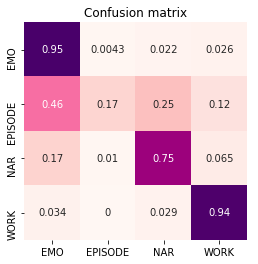

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

m = confusion_matrix(test.TAG, predictions_tfidf)
m = m.astype('float') / m.sum(axis=1)[:, np.newaxis]

labels = clf_tfidf.classes_
plt.figure(figsize = (4,4))
sns.heatmap(data=m, annot=True, cbar=False, xticklabels=labels, yticklabels=labels, cmap="RdPu")
plt.title("Confusion matrix")
plt.show()

### Эксперименты с тремя тегами

In [43]:
# загружаем файлы
train = pd.read_csv("./unbalanced_dataset/train.csv", sep = "\t") 
test = pd.read_csv("./unbalanced_dataset/test.csv", sep = "\t")  

united = pd.concat([train, test])
united.TAG = united.TAG.apply(lambda x: "NAR_EPISODE" if x in ["NAR", "EPISODE"] else x)

In [44]:
Counter(united.TAG).most_common()

[('NAR_EPISODE', 1555), ('EMO', 1275), ('WORK', 950)]

In [45]:
len(train)

3024

In [46]:
train, test = train_test_split(united, test_size = 0.2, random_state=15)

In [47]:
# переводим трейн в вид с тремя тегами

In [48]:
len(test)

756

In [49]:
# переводим тест в вид с тремя тегами

In [50]:
clf_tfidf = Pipeline([
    ('vect', tfidf_12),
    ('clf', classifier_tfidf),
])

# учим классификатор
%time clf_tfidf.fit(train.notes, train.TAG)

CPU times: user 5.04 s, sys: 2.06 s, total: 7.1 s
Wall time: 3.52 s


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=10, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [51]:
predictions = clf_tfidf.predict(test.notes)

In [52]:
evaluate(predictions, test.TAG)

Macro
Precision:   0.87
Recall:   0.89
F1-measure:   0.88
... 

Micro
Precision:   0.88
Recall:   0.88
F1-measure:   0.88
...
Accuracy:   0.88


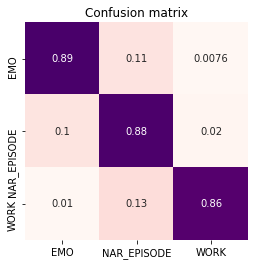

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

m = confusion_matrix(test.TAG, predictions)
m = m.astype('float') / m.sum(axis=1)[:, np.newaxis]

labels = clf_tfidf.classes_
plt.figure(figsize = (4,4))
sns.heatmap(data=m, annot=True, cbar=False, xticklabels=labels, yticklabels=labels, cmap="RdPu")
plt.title("Confusion matrix")
plt.show()

In [54]:
emo = united[united.TAG == "EMO"].sample(950)
nar_episode = united[united.TAG == "NAR_EPISODE"].sample(950)
work = united[united.TAG == "WORK"].sample(950)

balanced = pd.concat([emo, nar_episode, work])

In [55]:
train, test = train_test_split(balanced, test_size = 0.2, random_state=15)

In [56]:
len(train), len(test)

(2280, 570)

In [57]:
clf_tfidf = Pipeline([
    ('vect', tfidf_12),
    ('clf', classifier_tfidf),
])

# учим классификатор
%time clf_tfidf.fit(train.notes, train.TAG)

CPU times: user 3.89 s, sys: 1.54 s, total: 5.43 s
Wall time: 2.47 s


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=10, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [58]:
predictions = clf_tfidf.predict(test.notes)

In [59]:
evaluate(predictions, test.TAG)

Macro
Precision:   0.85
Recall:   0.85
F1-measure:   0.85
... 

Micro
Precision:   0.85
Recall:   0.85
F1-measure:   0.85
...
Accuracy:   0.85


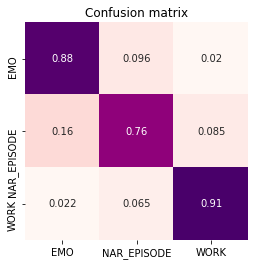

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

m = confusion_matrix(test.TAG, predictions)
m = m.astype('float') / m.sum(axis=1)[:, np.newaxis]

labels = clf_tfidf.classes_
plt.figure(figsize = (4,4))
sns.heatmap(data=m, annot=True, cbar=False, xticklabels=labels, yticklabels=labels, cmap="RdPu")
plt.title("Confusion matrix")
plt.show()

In [61]:
import pickle    

In [62]:
tfidf_pickle_path = "tfidf_classifier.pkl"
 
# Create an variable to pickle and open it in write mode
tfidf_pickle = open(tfidf_pickle_path, 'wb')
pickle.dump(clf_tfidf, tfidf_pickle)
tfidf_pickle.close()

In [63]:
all_dataset = pd.concat([train, test])

In [64]:
all_dataset.to_csv("gold_train.csv", sep = "\t")